In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Dropout



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ascii_file_counts.csv to ascii_file_counts.csv


In [ ]:
# loading data in a pandas dataframe
data = pd.read_csv(list(uploaded.keys())[0])
data.head()

,ASCII Value,Character,Number of Files
0,33,!,207
1,34,"""",267
2,35,#,152
3,36,$,192
4,37,%,190


Image Processing

In [ ]:
# displaying distinct labels and total distinct count
print(data['Character'].unique())
print(len(data['Character'].unique()))

['!' '"' '#' '$' '%' '&' "'" '(' ')' '*' '+' ',' '-' '.' '/' '0' '1' '2'
 '3' '4' '5' '6' '7' '8' '9' ':' ';' '<' '=' '>' '?' '@' 'A' 'B' 'C' 'D'
 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V'
 'W' 'X' 'Y' 'Z' '[' ']' '^' '_' '`' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i'
 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z' '{'
 '|' '}' '~' nan]
94


In [ ]:
# creating dictionary of values and their respective labels
    labels = data['Character'].unique()
    values = [num for num in range(len(data['Character'].unique()))]
    dict_value_label = dict(zip(values,labels))
    dict_label_value = dict(zip(labels,values))


IndentationError: unexpected indent (ipython-input-2098951172.py, line 2)

In [ ]:
#plotting some of the values and corresponding labels as title
plt.figure(figsize=(20,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.title(y.iloc[i])
    plt.imshow(X.values[i].reshape(28,28), cmap=plt.get_cmap('Spectral'))
plt.show()

NameError: name 'plt' is not defined

Splitting the Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

NameError: name 'X' is not defined

In [ ]:
# Load image data and labels. You'll need to adjust this part based on where your image data is stored and how it's structured.
# For example, if you have image files, you might need to load them using libraries like OpenCV or Pillow.
# If your data is in a different format (e.g., a different CSV or a NumPy array), you'll need to read it accordingly.

# As a placeholder, let's assume you have your image data in a variable called `image_data` and corresponding labels in `image_labels`.
# Replace this with your actual data loading code:
# Example:
# image_data = np.random.rand(100, 28, 28) # Replace with your image data loading
# image_labels = np.random.randint(0, 10, 100) # Replace with your label loading

# Assuming your data is in a format where each row is an image and there's a separate column for labels:
# Example using the loaded 'data' DataFrame as a potential source (you'll likely need to adjust this significantly)
# It seems 'data' only contains counts, not image data. You'll need to load your image data from another source.

# Placeholder for X and y (replace with actual data loading)
# Assuming your image data is in a pandas DataFrame or NumPy array named `X_data` and labels in `y_data`
# X = X_data # Replace with your actual image data
# y = y_data # Replace with your actual labels

# Since the previous cells suggest you have loaded a CSV, and the plotting code reshapes to 28x28,
# it's possible your image data is flattened in a CSV. Let's assume your image data is in a CSV
# named 'image_data.csv' and labels are in a column named 'label'.

# Example: Load image data and labels from CSV (adjust filename and column names as needed)
try:
    image_df = pd.read_csv('image_data.csv') # Replace 'image_data.csv' with your actual filename
    # Assuming your image data is in columns other than the label column
    # and your label column is named 'label'
    X = image_df.drop('label', axis=1) # Replace 'label' with your label column name
    y = image_df['label'] # Replace 'label' with your label column name
    print("Image data and labels loaded successfully from 'image_data.csv'.")
    print("X shape:", X.shape)
    print("y shape:", y.shape)

except FileNotFoundError:
    print("Error: 'image_data.csv' not found.")
    print("Please replace 'image_data.csv' with the correct filename for your image data.")
    print("Also, adjust the column names for image data and labels as needed.")
    # Create placeholder data for X and y to allow the rest of the notebook to run (will not show actual images)
    X = pd.DataFrame(np.random.rand(50, 784)) # Placeholder for 50 images of 28x28 (784 pixels)
    y = pd.Series(np.random.randint(0, 10, 50)) # Placeholder labels
    print("Using placeholder data for X and y. Please load your actual image data.")

Error: 'image_data.csv' not found.
Please replace 'image_data.csv' with the correct filename for your image data.
Also, adjust the column names for image data and labels as needed.
Using placeholder data for X and y. Please load your actual image data.


one_hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
y_train = enc.fit_transform(y_train.values.reshape(-1, 1))
y_test = enc.transform(y_test.values.reshape(-1, 1)) # Use transform on test set
y_train, y_test

NameError: name 'y_train' is not defined

Normlization

In [ ]:
# converting the flattened representation back into a 2D array with dimensions 28 X 28 with 1 color
X_train=X_train.values.reshape(X_train.shape[0],28,28,1)
X_test=X_test.values.reshape(X_test.shape[0],28,28,1)

# normalizing the train and test dataset and bringing tis range from 0 to 1 by dividing the code by 255
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


NameError: name 'X_train' is not defined

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (40, 784)
X_test shape: (10, 784)
y_train shape: (40,)
y_test shape: (10,)


Build Architecture

In [ ]:
# converting the flattened representation back into a 2D array with dimensions 28 X 28 with 1 color
X_train=X_train.values.reshape(X_train.shape[0],28,28,1)
X_test=X_test.values.reshape(X_test.shape[0],28,28,1)

# normalizing the train and test dataset and bringing tis range from 0 to 1 by dividing the code by 255
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (40, 28, 28, 1)
X_test shape: (10, 28, 28, 1)


CNN Model Training

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128, verbose=1)

NameError: name 'model' is not defined

In [ ]:
# Build the CNN model
model = Sequential()

# Add Convolutional layers
model.add(Convolution2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for the Dense layers
model.add(Flatten())

# Add Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax')) # Output layer with number of classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


IndexError: tuple index out of range

Model Evaluation

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Evaluate
evaluation = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
print(f'\nSummary: \n\tLoss over the test dataset: {round(evaluation[0],2)} \n\tAccuracy: {round(evaluation[1]*100,2)}%')

Monitor performance of CNN Traning

NameError: name 'history' is not defined

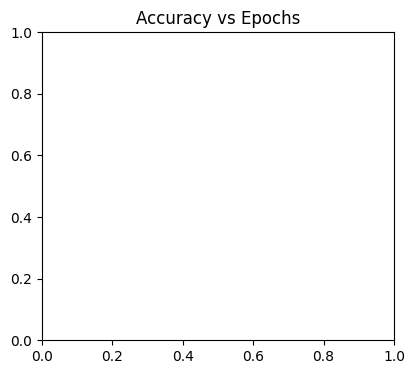

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
epochs=np.arange(100)

plt.title('Accuracy vs Epochs')
plt.plot(epochs,history.history['accuracy'],label='train', color='#851D2D')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs,history.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,history.history['loss'],label='train', color='#851D2D')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs,history.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.show()